In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')


/kaggle/input/ushealthinsurancedataset/insurance.csv


In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data prepocessing & Exploratory Analysis (EDA) 

In [3]:
 # Prints number of rows and columns in dataframe
df.shape

(1338, 7)

In [4]:
# Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Summary statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Check data type for all columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Check if null values exsist
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Check for duplication
print('Total amount of duplicated rows:', df.duplicated().sum())

Total amount of duplicated rows: 1


In [9]:
# Identify duplicated rows
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# Drop duplicated rows
df.drop_duplicates(keep='first', inplace=True)

# Check again if duplication removed
print('Total amount of duplicated rows:', df.duplicated().sum())



Total amount of duplicated rows: 0


In [11]:
# Check if there is null value or missing value
null = df.isnull().sum()
print(null)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Visualisation

In [12]:
# Split into categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['number']).columns


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

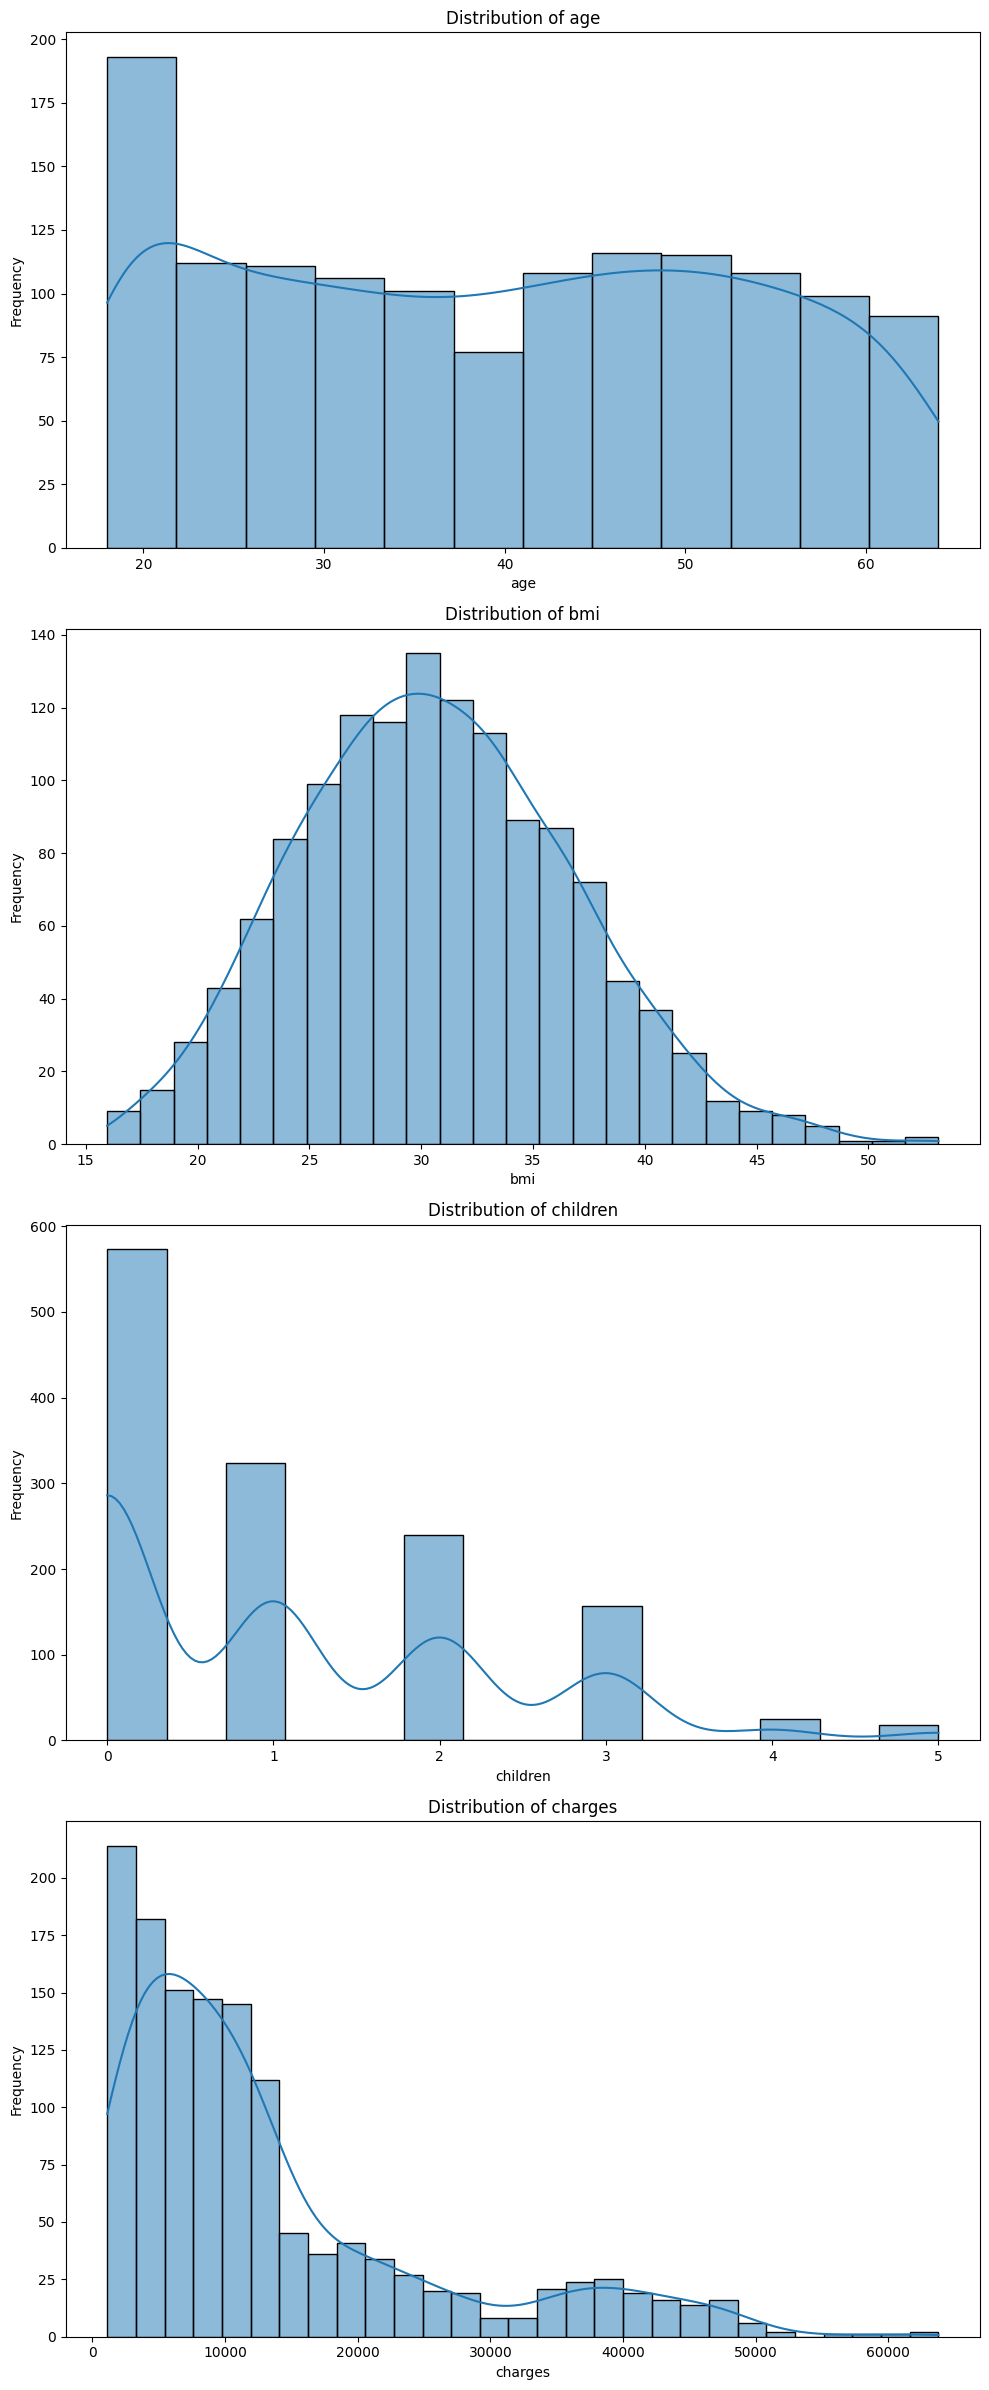

In [13]:
# Visualize distribution of numeric columns with plotly
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 6 * len(numeric_cols)))
for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

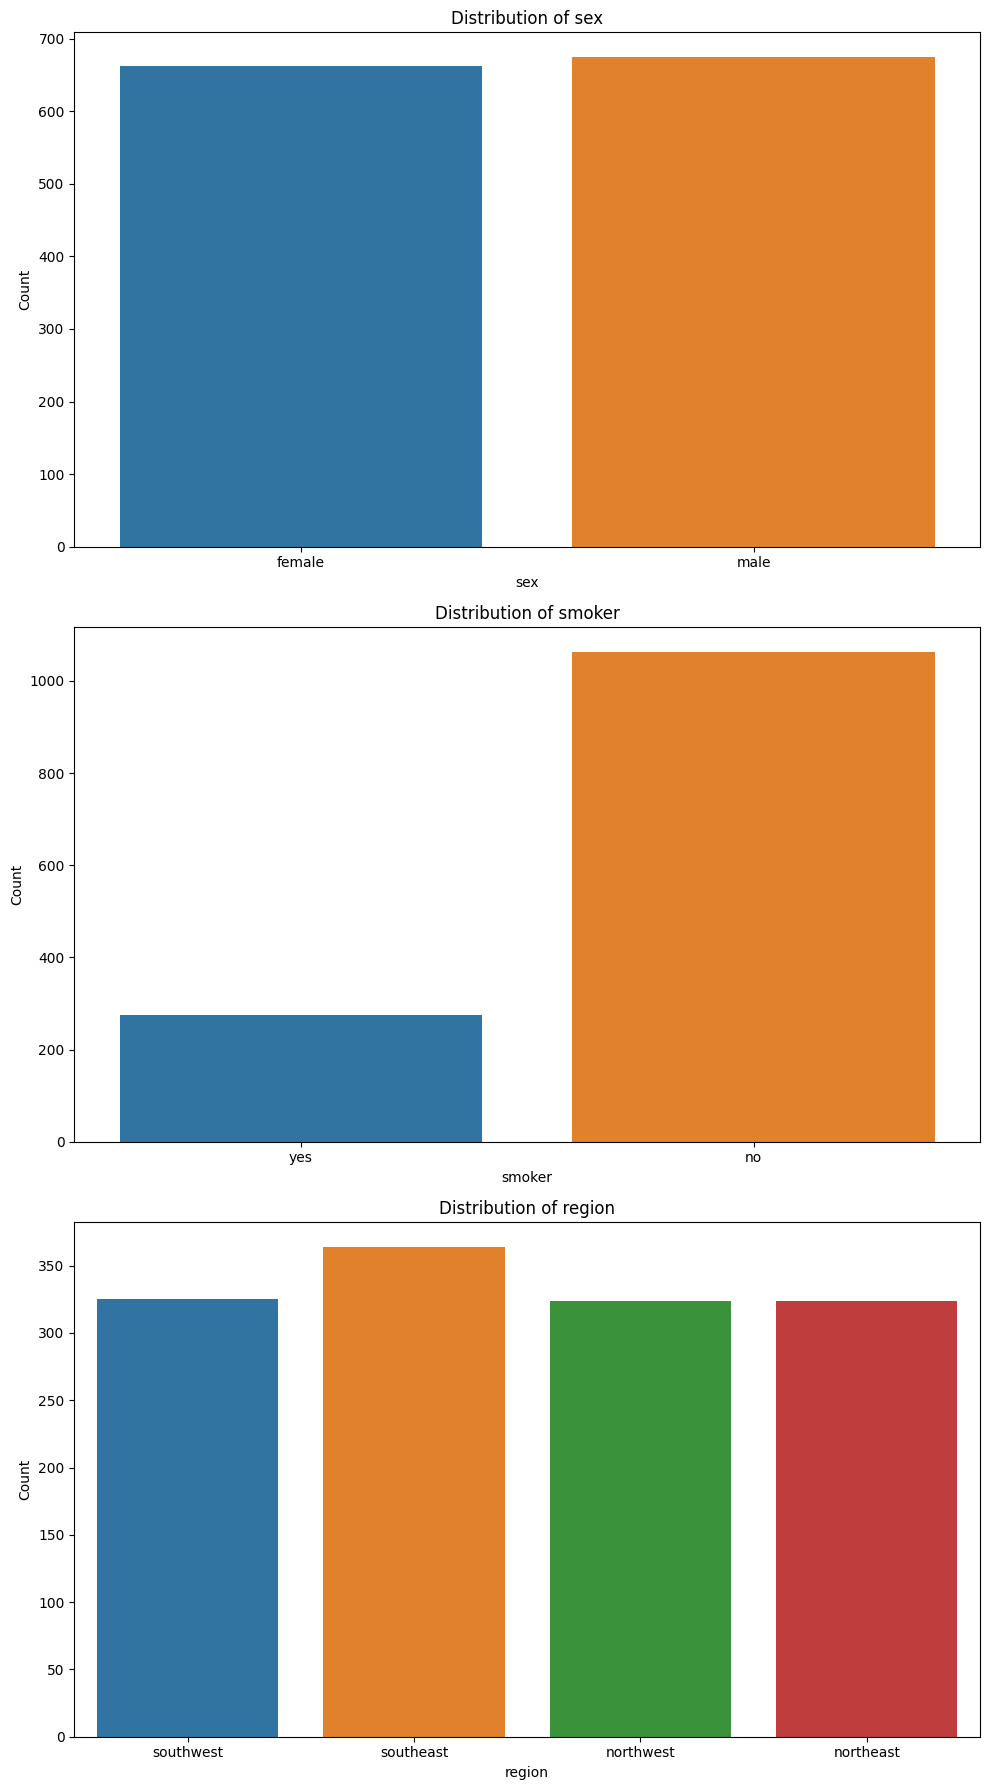

In [14]:
# Visualize distribution for categorical columns with plotly
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 6 * len(categorical_cols)))
for ax, col in zip(axes, categorical_cols):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


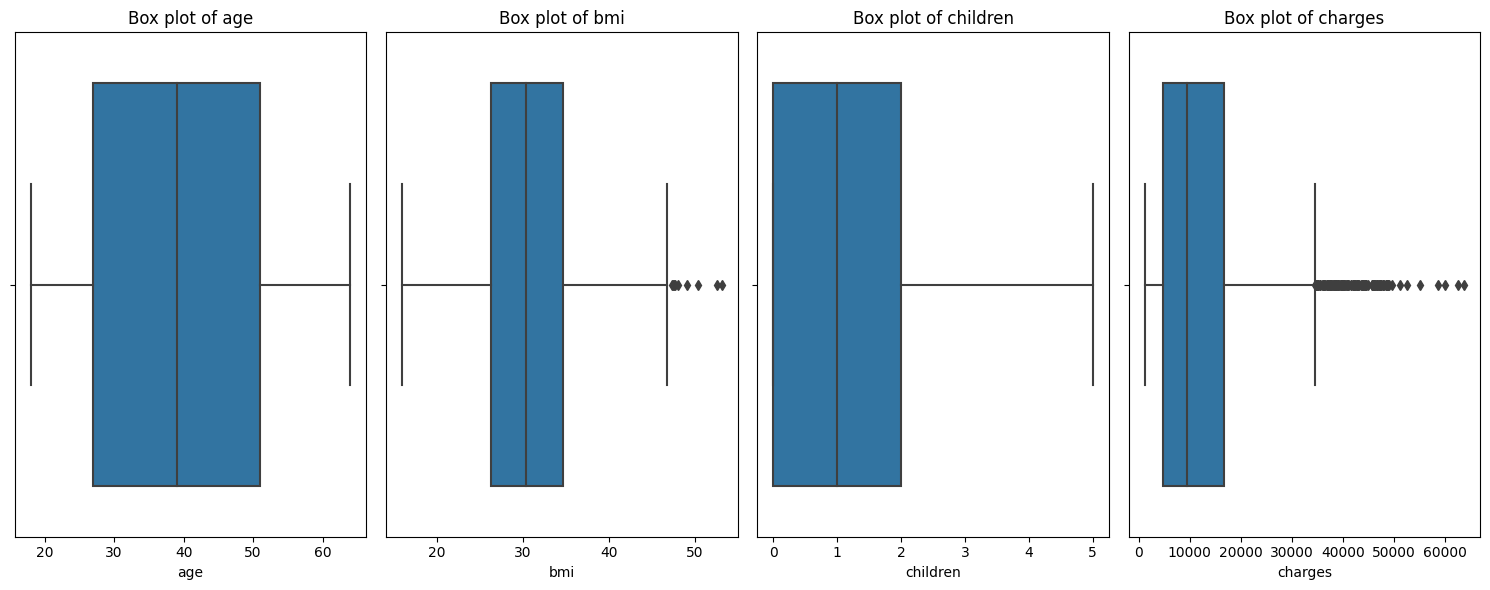

In [15]:
# Identify outliers for numerical columns using boxplots
# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

# Plot each numeric column in a subplot
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Box plot of {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


In [16]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Outliers detected at indices:", df[outliers].index)


Outliers detected at indices: Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
       ...
       1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1317, 1323],
      dtype='int64', length=145)


# Observations:

**Numerical variables**
1. Distribution of age,children and charges are uneven.
2. BMI is normally distributed. 
3. Age in the dataset are from ranges minimum 18 to 64 years old.
3. Outliers: BMI and charges contain most outliers.

**Categorical variables**
1. Sex: Similar/equal in proportional.
2. Smoker: We have more non-smoker in the dataset.
3. Regio: Southeast region is slightly higher than other region.


# Q1:Are there any correlation between the numerical variables?


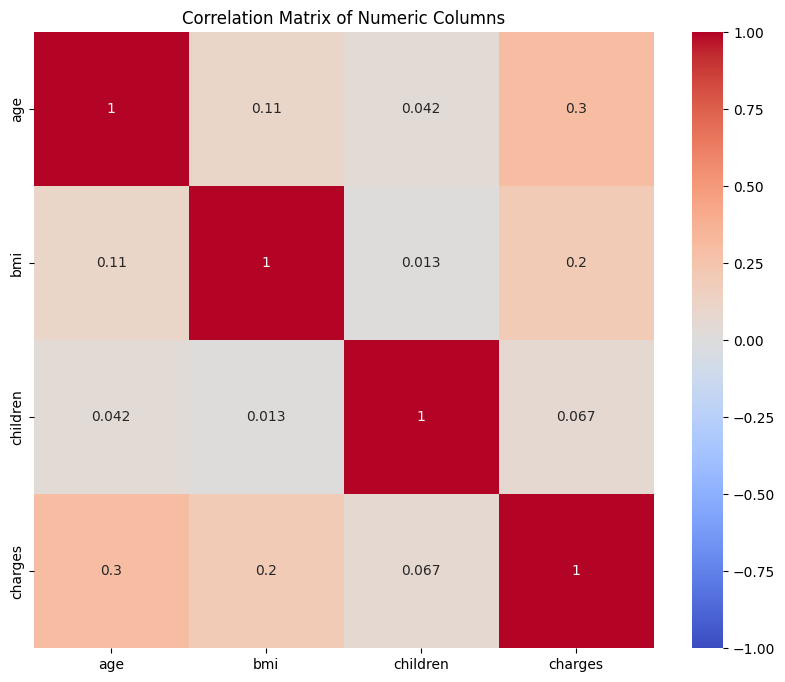

In [17]:
# Question: Are there any correlation between the numerical variables?
# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# Observation: Based Peasrson correlation analysis, we can see that (charges vs age) AND (bmi vs charges) are slightly correlated.

## Age vs. Charges

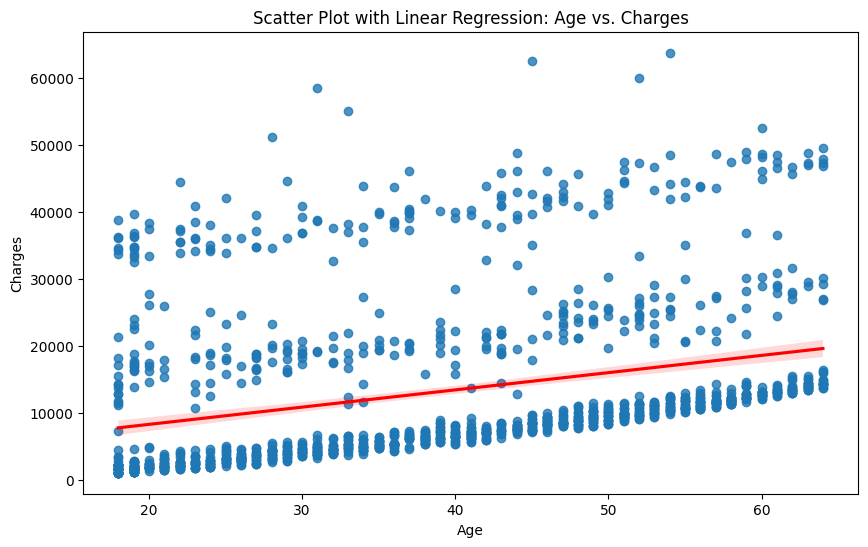

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df, line_kws={'color': 'red'})
plt.title('Scatter Plot with Linear Regression: Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

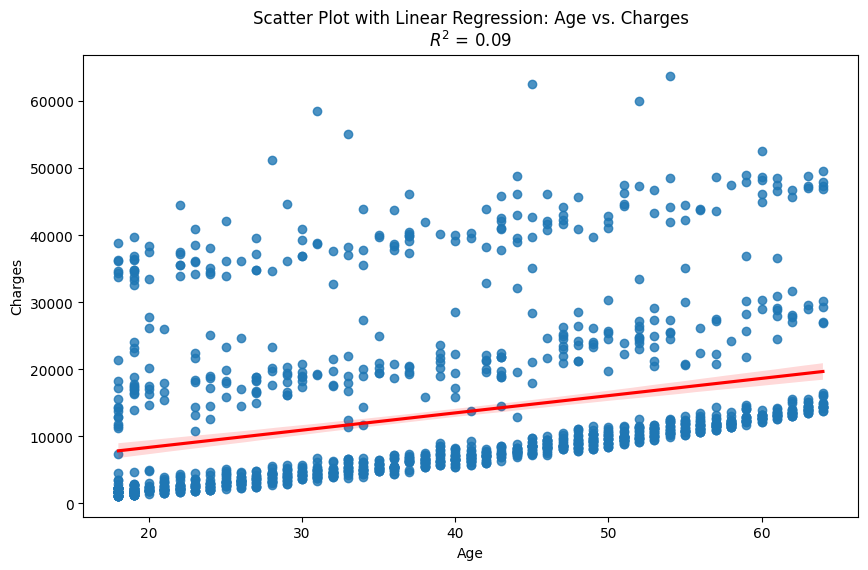

In [19]:
import statsmodels.api as sm

# Fit the regression model
X = df['age']
y = df['charges']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
r_squared = model.rsquared

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df, line_kws={'color': 'red'})
plt.title(f'Scatter Plot with Linear Regression: Age vs. Charges\n$R^2$ = {r_squared:.2f}')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

## BMI vs. Charges

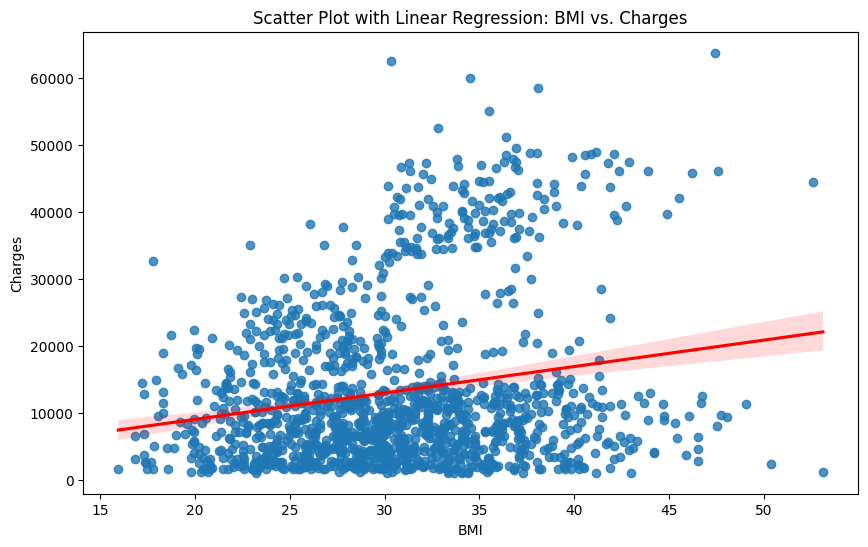

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color': 'red'})
plt.title('Scatter Plot with Linear Regression: BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

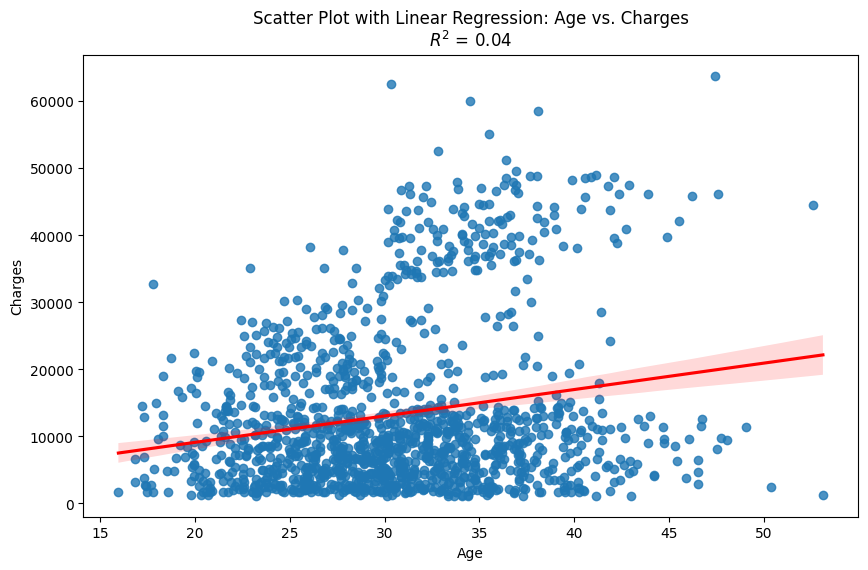

In [21]:
import statsmodels.api as sm

# Fit the regression model
X = df['bmi']
y = df['charges']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
r_squared = model.rsquared

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color': 'red'})
plt.title(f'Scatter Plot with Linear Regression: Age vs. Charges\n$R^2$ = {r_squared:.2f}')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Q2: Are there any correlation between the numerical variables & categorical variables?


In [22]:
from scipy.stats import pointbiserialr

# Convert binary categorical variables to numeric
df['sex_binary'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker_binary'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Point Biserial Correlation for sex
correlation_sex, p_value_sex = pointbiserialr(df['sex_binary'], df['charges'])
print(f'Point Biserial Correlation for sex: {correlation_sex}, p-value: {p_value_sex}')

# Point Biserial Correlation for smoker
correlation_smoker, p_value_smoker = pointbiserialr(df['smoker_binary'], df['charges'])
print(f'Point Biserial Correlation for smoker: {correlation_smoker}, p-value: {p_value_smoker}')


Point Biserial Correlation for sex: 0.05804449579031287, p-value: 0.03382079199512013
Point Biserial Correlation for smoker: 0.7872343672800317, p-value: 1.4067220949377421e-282


In [23]:
# Box plots for binary categorical variables
for cat_col in ['sex', 'smoker']:
    for num_col in ['age', 'bmi', 'children', 'charges']:
        fig = px.box(df, x=cat_col, y=num_col, title=f'{num_col} by {cat_col}')
        fig.show()

In [24]:
# Box plots for region
for num_col in ['age', 'bmi', 'children', 'charges']:
    fig = px.box(df, x='region', y=num_col, title=f'{num_col} by region')
    fig.show()


# Observations:
1. Woman seem to have slightly higher insurance charges.
2. For people who smoke tend to get higher insurance charges compared to those who are non-smoker.
3. Amount of children has no effect. 
3. Southeast has the highest BMI compared to 3 other regions.
4. Southwest has lowest insurance charges compared to 3 other regions.
5. Northeast has slightly more elderly compared to 3 other regions.

# Q3: Are the observations from the previous analysis are correct?

## **Hypothesis testing**

In [25]:
# T-test for binary variables (sex & smoker)
from scipy.stats import ttest_ind

# T-test for sex
charges_male = df[df['sex'] == 'male']['charges']
charges_female = df[df['sex'] == 'female']['charges']
t_stat_sex, p_val_sex = ttest_ind(charges_male, charges_female)
print(f'T-test for sex: t-statistic = {t_stat_sex}, p-value = {p_val_sex}')

# T-test for smoker
charges_smoker = df[df['smoker'] == 'yes']['charges']
charges_non_smoker = df[df['smoker'] == 'no']['charges']
t_stat_smoker, p_val_smoker = ttest_ind(charges_smoker, charges_non_smoker)
print(f'T-test for smoker: t-statistic = {t_stat_smoker}, p-value = {p_val_smoker}')


T-test for sex: t-statistic = 2.124391307062026, p-value = 0.0338207919951195
T-test for smoker: t-statistic = 46.64479459840305, p-value = 1.4067220949376498e-282


In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for charges across different regions
model_charges = ols('charges ~ C(region)', data=df).fit()
anova_table_charges = sm.stats.anova_lm(model_charges, typ=2)
print('ANOVA for charges by region:\n', anova_table_charges)

# ANOVA for BMI across different regions
model_bmi = ols('bmi ~ C(region)', data=df).fit()
anova_table_bmi = sm.stats.anova_lm(model_bmi, typ=2)
print('ANOVA for BMI by region:\n', anova_table_bmi)

# ANOVA for Age across different regions
model_age = ols('age ~ C(region)', data=df).fit()
anova_table_age = sm.stats.anova_lm(model_age, typ=2)
print('ANOVA for Age by region:\n', anova_table_age)



ANOVA for charges by region:
                  sum_sq      df        F    PR(>F)
C(region)  1.281906e+09     3.0  2.92614  0.032763
Residual   1.946569e+11  1333.0      NaN       NaN
ANOVA for BMI by region:
                  sum_sq      df          F        PR(>F)
C(region)   4057.813904     3.0  39.485939  1.908729e-24
Residual   45662.381091  1333.0        NaN           NaN
ANOVA for Age by region:
                   sum_sq      df         F    PR(>F)
C(region)      47.890164     3.0  0.080765  0.970477
Residual   263469.134518  1333.0       NaN       NaN


In [27]:
# ANOVA for charges across different numbers of children
model_children = ols('charges ~ C(children)', data=df).fit()
anova_table_children = sm.stats.anova_lm(model_children, typ=2)
print('ANOVA for charges by number of children:\n', anova_table_children)


ANOVA for charges by number of children:
                    sum_sq      df         F    PR(>F)
C(children)  2.376795e+09     5.0  3.268734  0.006133
Residual     1.935620e+11  1331.0       NaN       NaN


# Interpretation of Results
**T-test for Sex**
* t-statistic = 2.124
* p-value = 0.0338
Since the p-value is less than 0.05, the difference in insurance charges between males and females is statistically significant. This supports your observation that women tend to have slightly higher insurance charges.

**T-test for Smoker**
* t-statistic = 46.645
* p-value ≈ 0
The extremely low p-value indicates a highly significant difference in insurance charges between smokers and non-smokers. This confirms your observation that smokers tend to have higher insurance charges compared to non-smokers.

**ANOVA for Charges by Region**
* F = 2.926
* p-value = 0.0328
The p-value is less than 0.05, indicating that there are significant differences in insurance charges across different regions. This supports your observation that the Southwest region has the lowest insurance charges compared to the other regions.

**ANOVA for BMI by Region**
* F = 39.486
* p-value ≈ 0
The extremely low p-value indicates significant differences in BMI across different regions. This confirms your observation that the Southeast region has the highest BMI compared to the other regions.

**These statistical tests validate my observations from the boxplot visualisations.**
**ANOVA for charges by number of children & ANOVA for Age by region proved that null hypothesis rejected.**

# Q4 : What are the relationships between all both numerical and encoded categorical?

### Prepocessing data

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

In [29]:
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
charges          float64
sex_binary         int64
smoker_binary      int64
dtype: object

In [30]:
# Label encode binary categorical variables
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

# One-hot encode multi-category variable
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Drop original categorical columns
df.drop(['sex', 'smoker'], axis=1, inplace=True)

# Convert boolean columns to integers
df['region_northwest'] = df['region_northwest'].astype(int)
df['region_southeast'] = df['region_southeast'].astype(int)
df['region_southwest'] = df['region_southwest'].astype(int)

print("Data after encoding and dropping original columns:")
print(df.head())

Data after encoding and dropping original columns:
   age     bmi  children      charges  sex_binary  smoker_binary  sex_encoded  \
0   19  27.900         0  16884.92400           0              1            0   
1   18  33.770         1   1725.55230           1              0            1   
2   28  33.000         3   4449.46200           1              0            1   
3   33  22.705         0  21984.47061           1              0            1   
4   32  28.880         0   3866.85520           1              0            1   

   smoker_encoded  region_northwest  region_southeast  region_southwest  
0               1                 0                 0                 1  
1               0                 0                 1                 0  
2               0                 0                 1                 0  
3               0                 1                 0                 0  
4               0                 1                 0                 0  



Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:52:17   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



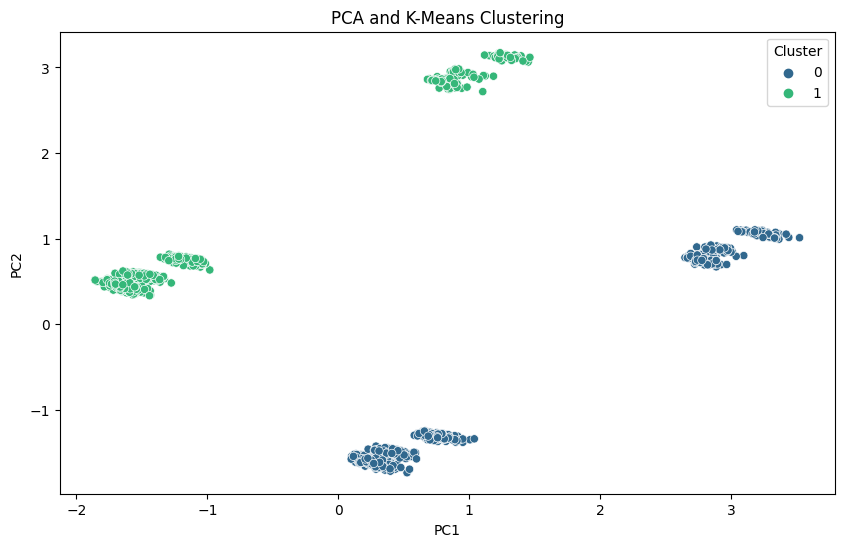

In [31]:
# Regression Analysis
X = df[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print("\nRegression Analysis Summary:")
print(model.summary())

# Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['charges']))

# Apply PCA for clustering visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA and K-Means Clustering')
plt.show()


# Q5 : Which feature are most important features to affect the insurance charges?


Feature Importances:
            Feature  Importance
4    smoker_encoded    0.620824
1               bmi    0.213140
0               age    0.127909
2          children    0.018289
3       sex_encoded    0.005763
5  region_northwest    0.005644
6  region_southeast    0.004424
7  region_southwest    0.004007


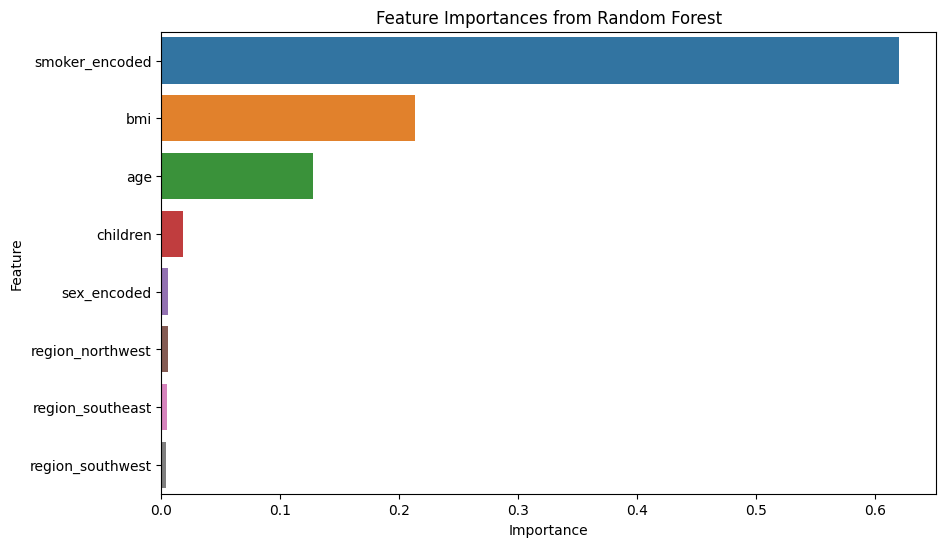

In [32]:
# Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X.drop(columns=['const']), y)

feature_importances = rf_model.feature_importances_
features = X.columns[1:]  # Exclude the constant column

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("\nFeature Importances:")
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

### Conclusion

Based on the regression analysis summary and importance features, it looks like smoker_encoded, bmi, and age are indeed significant predictors of insurance charges. 
 

# Q6 : With top features, can we use to predict the changes of insurance chargers?

### Regression Analysis with Top Features

In [33]:
# Define X_top_features
X_top_features = df[['age', 'bmi', 'smoker_encoded', 'region_northwest']]
X_top_features = sm.add_constant(X_top_features)

# Perform regression analysis
model_top_features = sm.OLS(y, X_top_features).fit()

print("\nDetailed Regression Analysis Summary:")
print(model_top_features.summary())



Detailed Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     985.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:52:19   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1332   BIC:                         2.713e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
c

### Regression Analysis with Interaction term

In [34]:
# Create interaction term
df['smoker_bmi_interaction'] = df['smoker_encoded'] * df['bmi']

# Regression with interaction term
X_interaction = df[['age', 'bmi', 'smoker_encoded','region_northwest', 'smoker_bmi_interaction']]
X_interaction = sm.add_constant(X_interaction)
model_interaction = sm.OLS(y, X_interaction).fit()

print("\nRegression Analysis with Interaction Term Summary:")
print(model_interaction.summary())



Regression Analysis with Interaction Term Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1360.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:52:20   Log-Likelihood:                -13257.
No. Observations:                1337   AIC:                         2.653e+04
Df Residuals:                    1331   BIC:                         2.656e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Visualisations

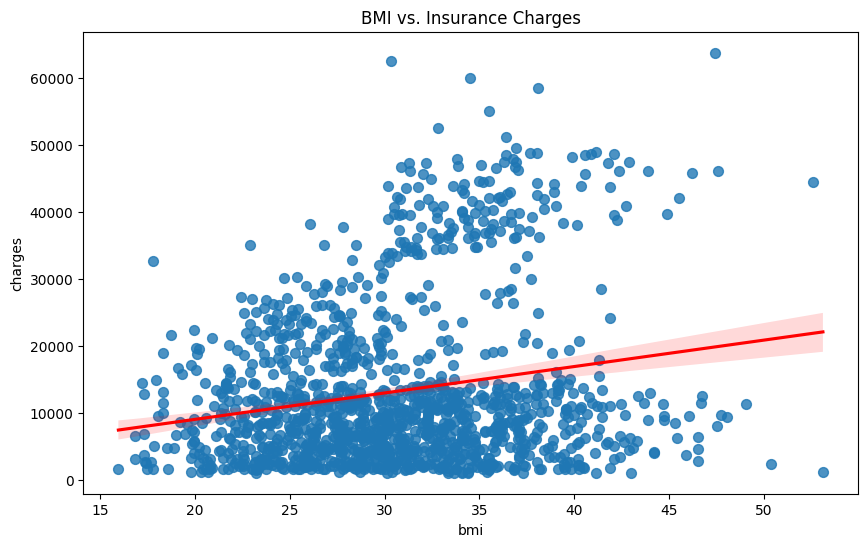

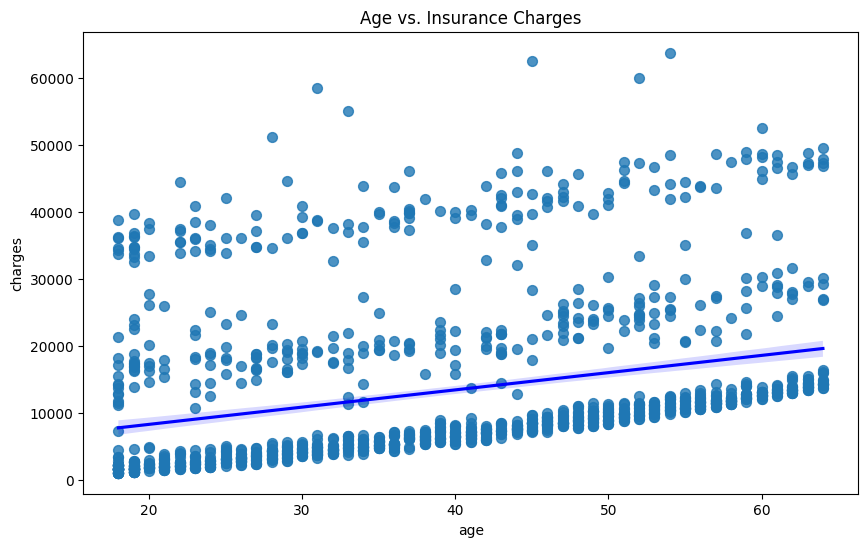

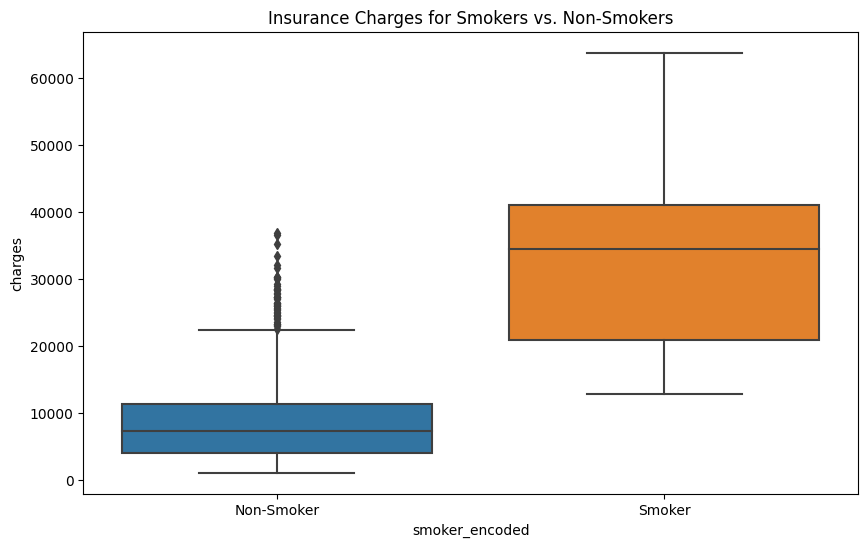

In [35]:
# Scatter Plot with Regression Line for BMI
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('BMI vs. Insurance Charges')
plt.show()


# Scatter Plot with Regression Line for Age
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Age vs. Insurance Charges')
plt.show()

# Box Plot for Smoker vs. Non-Smoker
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker_encoded', y='charges', data=df)
plt.title('Insurance Charges for Smokers vs. Non-Smokers')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

### Results
1. Regression Analysis: The regression analysis summaries provide detailed insights into the significance and impact of each feature and interaction term.
2. Visualisations: The scatter plots and box plot visually represent the relationships between the features and insurance charges.

** Since we understand what is important in feature importance now, move on to predictive model

Random Forest Mean Squared Error: 22420199.49811019
Support Vector Machine Mean Squared Error: 208462984.29666784
Gradient Boosting Regressor Mean Squared Error: 18046895.54612879
XGBoost Mean Squared Error: 27074231.536291692

Model Performance (MSE):
Random Forest: 22420199.49811019
Support Vector Machine: 208462984.29666784
Gradient Boosting Regressor: 18046895.54612879
XGBoost: 27074231.536291692

Feature Importances (Random Forest):
            Feature  Importance
2    smoker_encoded    0.601917
1               bmi    0.253049
0               age    0.137520
3  region_northwest    0.007514


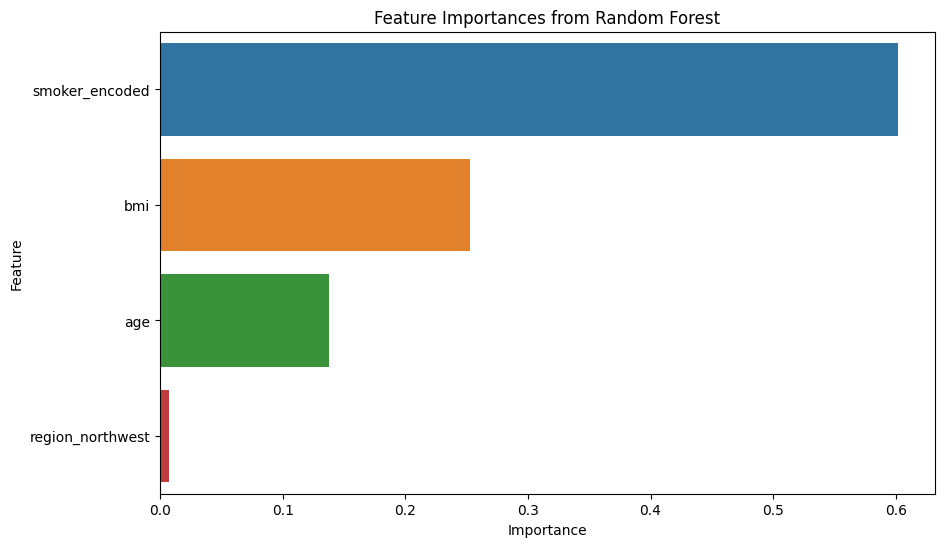

In [36]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Define features and target variable
X = df[['age', 'bmi', 'smoker_encoded', 'region_northwest']]
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models 
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Store the results
results = {}

# Loop over models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the result
    results[model_name] = mse
    print(f"{model_name} Mean Squared Error: {mse}")

# Print all MSE results for comparison
print("\nModel Performance (MSE):")
for model_name, mse in results.items():
    print(f"{model_name}: {mse}")

# For Random Forest, show feature importances
rf_model = models['Random Forest']
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("\nFeature Importances (Random Forest):")
print(importance_df)

# Visualize feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


### Performance Summary (MSE):
- Gradient Boosting Regressor: 18046.895 (Lowest MSE, best performance)
- Random Forest: 22420.199 (Second-best)
- Support Vector Machine: 208462.984 (Much higher MSE, worse performance)
- XGBoost :27074231.53(Highest MSE, worst performance)

#### Insights:
1. Gradient Boosting Regressor: This model outperforms the others, which is expected in many cases, especially when the relationships between the features and the target are complex. Gradient Boosting is known for being very efficient in fitting complex patterns due to its iterative nature and boosting weak learners.

2. Random Forest: While not as strong as Gradient Boosting in this case, Random Forest still performed well, showing its robustness and ability to handle multiple feature interactions through its ensemble of decision trees.

3. Support Vector Machine and XGBoost: The much higher MSE indicates that SVM and XGBoost did not perform well for this regression task, likely because SVMs and XGBoost tend to work better with smaller datasets or specific kernel choices. Without kernel tuning or scaling, the model is struggling.# Feature Importances for Gradient Boosting Regressor


### Model Validation and Residual Analysis for your best-performing model, which is the Gradient Boosting Regressor with the lowest Mean Squared Error

Performing cross-validation for Gradient Boosting Regressor...
Cross-validated MSE: [32906629.48299907 19643250.53282337 20940734.96251773 20467004.4187455
 24973874.40874534]
Mean Cross-validated MSE: 23786298.761166204


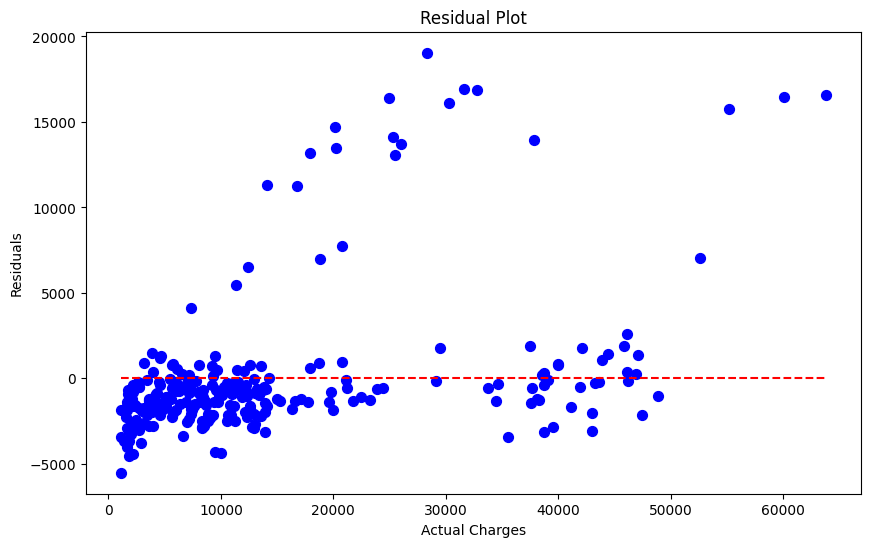

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



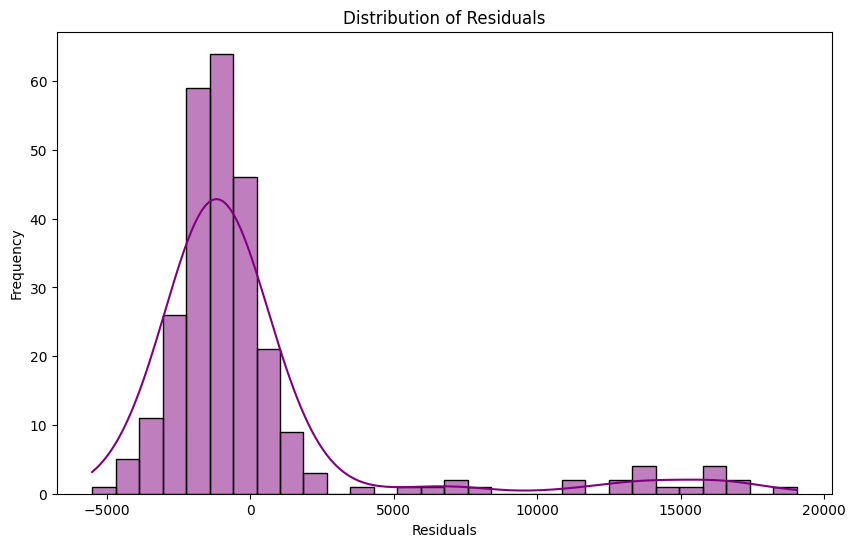

Mean of Residuals: 8.088004612634673


In [37]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform 5-fold cross-validation on the Gradient Boosting Regressor
print("Performing cross-validation for Gradient Boosting Regressor...")
cv_scores = cross_val_score(models['Gradient Boosting Regressor'], X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_mse = -cv_scores
mean_cv_mse = np.mean(cv_mse)
print(f"Cross-validated MSE: {cv_mse}")
print(f"Mean Cross-validated MSE: {mean_cv_mse}")

# Fit the model to the entire training set and predict on the test set
best_model = models['Gradient Boosting Regressor']
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Residual Analysis
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color="blue", s=50)
plt.hlines(0, min(y_test), max(y_test), colors='red', linestyles='dashed')
plt.title('Residual Plot')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.show()

# Distribution of Residuals (Checking for Normality)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Mean of Residuals
print(f"Mean of Residuals: {np.mean(residuals)}")


Mean Absolute Percentage Error (MAPE): 34.46%


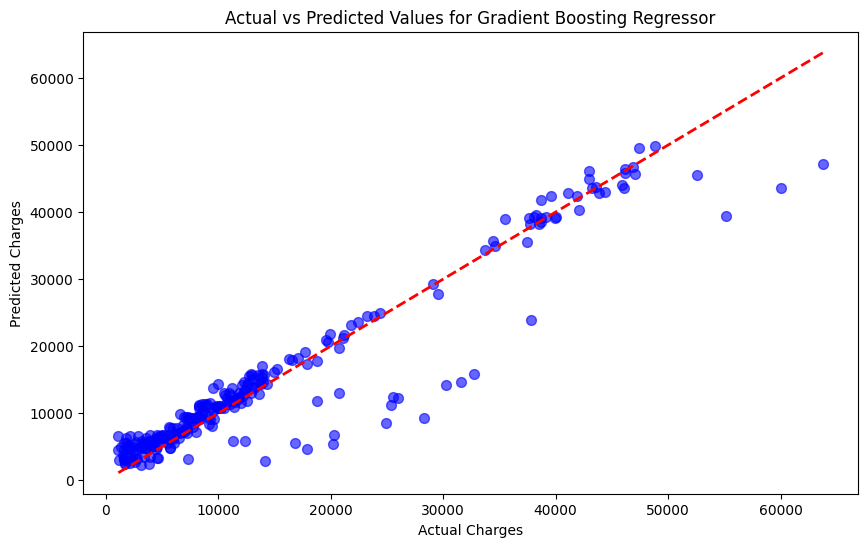

In [38]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for Gradient Boosting Regressor
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", lw=2)
plt.title('Actual vs Predicted Values for Gradient Boosting Regressor')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


#### Save model with joblib

In [39]:
import joblib

# Save the trained Gradient Boosting Regressor model
joblib.dump(best_model, 'gradient_boosting_regressor_model.pkl')


['gradient_boosting_regressor_model.pkl']

#### Load model for testing prediction health insurance charges based on important features obtained 

In [40]:
# Load the model
best_model = joblib.load('gradient_boosting_regressor_model.pkl')


#### Prediction and Displaying Sample Data

In [41]:
# smoker_encoded = 1 (smoker), bmi = 30, age = 45, region_northwest = 1
random_values = [[1, 34, 31, 1]]  

# Predict charges using the trained Gradient Boosting Regressor model
predicted_charges = best_model.predict(random_values)

print(f"Predicted Charges: {predicted_charges[0]:.2f}")

Predicted Charges: 34329.30


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



In [42]:
# Select a sample from the existing test data (e.g., the first row)
# Combine X_test and y_test into a single DataFrame for easier visualization
test_data_with_actual = X_test.copy()
test_data_with_actual['actual_charges'] = y_test

# Show the first 5 rows of test data with actual charges
test_data_with_actual.head()


,age,bmi,smoker_encoded,region_northwest,actual_charges
900,49,22.515,0,0,8688.85885
1064,29,25.600,0,0,5708.86700
1256,51,36.385,0,1,11436.73815
298,31,34.390,1,1,38746.35510
237,31,38.390,0,0,4463.20510


### Observation: Differences between actual and predicted charges are expected because the model may not perfectly capture all the relationships in the data.

## Check the Magnitude of the Difference

In [43]:
# Calculate the differences between actual and predicted values
test_data_with_actual['predicted_charges'] = best_model.predict(X_test)

# Calculate the error (difference)
test_data_with_actual['difference'] = test_data_with_actual['actual_charges'] - test_data_with_actual['predicted_charges']

# Show the first 5 rows with actual, predicted, and difference
print(test_data_with_actual[['actual_charges', 'predicted_charges', 'difference']].head())


      actual_charges  predicted_charges   difference
900       8688.85885       10272.697301 -1583.838451
1064      5708.86700        4883.362244   825.504756
1256     11436.73815       10940.672025   496.066125
298      38746.35510       38453.410799   292.944301
237       4463.20510        4704.628590  -241.423490


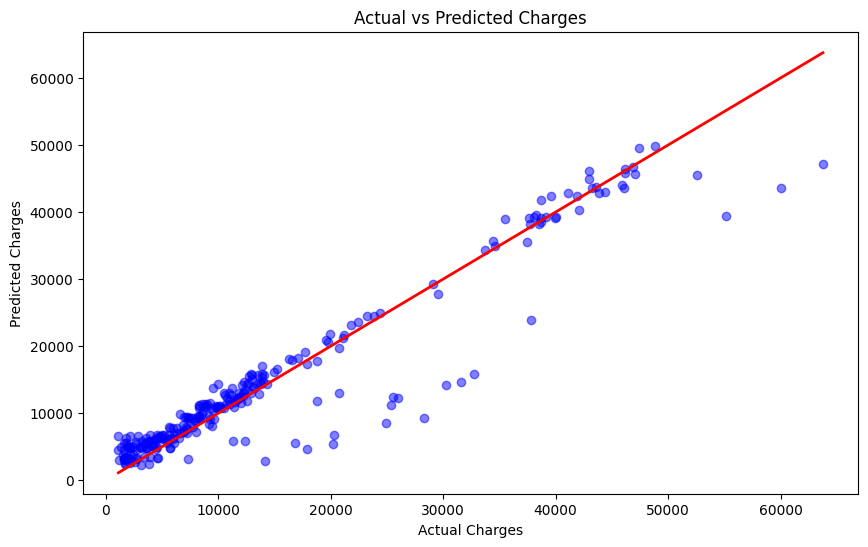

In [44]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_data_with_actual['actual_charges'], test_data_with_actual['predicted_charges'], color='blue', alpha=0.5)
plt.plot([test_data_with_actual['actual_charges'].min(), test_data_with_actual['actual_charges'].max()],
         [test_data_with_actual['actual_charges'].min(), test_data_with_actual['actual_charges'].max()],
         color='red', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()


In [45]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, best_model.predict(X_test))
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 2407.64


## Based on the analysis and modeling prediction:
* MAE measures the average magnitude of errors in the predictions, without considering their direction (i.e., whether the model over-predicts or under-predicts).
* An MAE of around 2407 means that, on average, the predicted charges differ from the actual charges by about 2407 units.
* We can reduce the MAE by readjusting the hyperparameter tuning. 
* The outliers for region feature cause be one of the cause that affect the prediction of the model.